In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pylab
%matplotlib inline

In [2]:
a =  np.load("classifier.0.weight.neg.npy")
print(a.shape)

(14400, 2)


In [3]:
shape = [(192, 3, 5, 5),(160, 192, 1, 1),(96, 160, 1, 1),(192, 96, 5, 5),(192, 192, 1, 1),(192, 192, 1, 1),(192, 192, 3, 3),(192, 192, 1, 1),(10, 192, 1, 1)]
b = np.zeros(shape[0])
size0 = b.shape[0]
size1 = b.shape[1]
size2 = b.shape[2]
size3 = b.shape[3]
for t in range(len(a)):
    i = a[t][0]
    b[int(i/size1/size2/size3)][int(i/size2/size3%size1)][int(i/size3%size2)][int(i%size3)] = a[t][1]

In [4]:
c = b.swapaxes(1,3)
c = (c>0.01) * 1.0
TheMap = np.zeros([size2,size3])
for i in range(size0):
    for j in range(size2):
        for k in range(size3):
            for l in range(size1):
                TheMap[j][k] += c[i][j][k][l]
print TheMap

[[317. 318. 340. 357. 328.]
 [321. 339. 390. 382. 325.]
 [333. 388. 380. 350. 326.]
 [321. 337. 356. 352. 341.]
 [301. 299. 317. 350. 308.]]


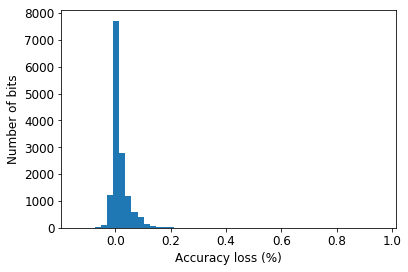

In [11]:
n, bins, patches = plt.hist(a[:,1],50,histtype='bar')
#n, bins, patches = plt.hist(b.reshape(-1),int(len(b.reshape(-1))/300),histtype='bar')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Accuracy loss (%)', fontsize=12)
plt.ylabel('Number of bits', fontsize=12)
plt.savefig("happy")

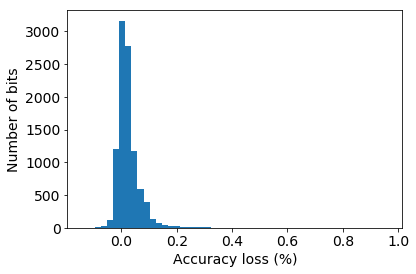

In [13]:
pos = []
for item in a[:,1]:
    if abs(item) > 0.0001:
        pos += [item]
n, bins, patches = plt.hist(pos,50,histtype='bar')
fontsize = 14
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.xlabel('Accuracy loss (%)', fontsize=fontsize)
plt.ylabel('Number of bits', fontsize=fontsize)
plt.savefig("happy")

In [59]:
import scipy.stats as st
bins = 50
y, x = np.histogram(pos, bins=bins, density=False)
x = (x + np.roll(x, -1))[:-1] / 2.0

params = st.norm.fit(pos,bins = 50, density = True)

# Separate parts of parameters
arg = params[:-2]
loc = params[-2]
scale = params[-1]

# Calculate fitted PDF and error with fit in distribution
pdf = st.norm.pdf(x, loc=loc, scale=scale, *arg)
sse = np.sum(np.power(y - pdf, 2.0))
print max(pdf)

9.644392331260853


/home/yanzy/Envs/fp/local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


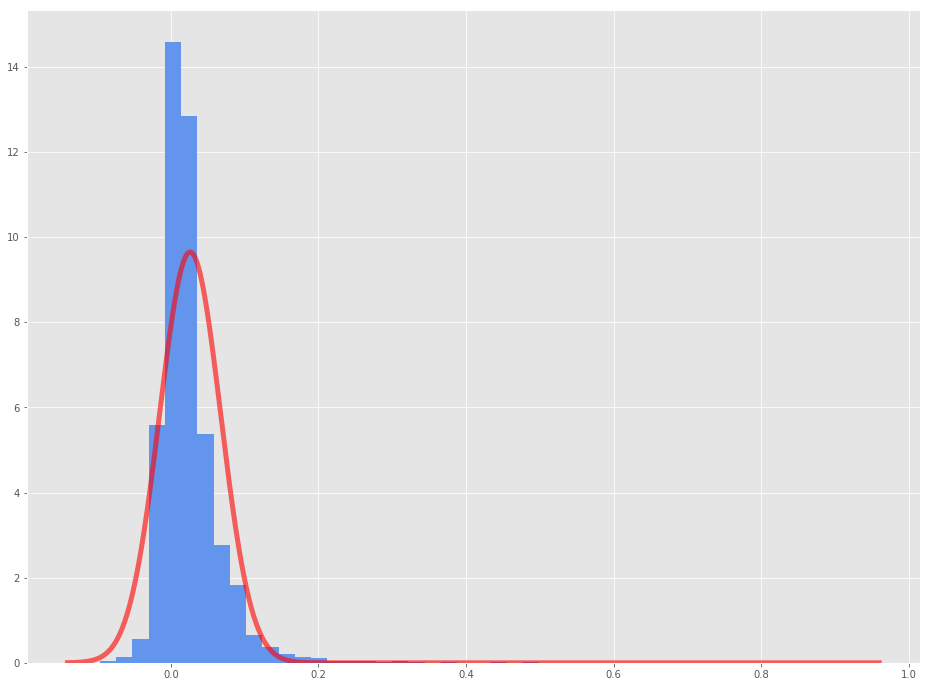

In [60]:
from scipy.stats import norm
fig, ax = plt.subplots(1, 1)

x = np.linspace(min(pos),max(pos), 1000)
n, bins, patches = ax.hist(pos,50,histtype='bar',color = 'cornflowerblue', normed=True)
ax.plot(x, norm.pdf(x,loc,scale),
        'r-', lw=5, alpha=0.6, label='norm pdf')